**Import Libraries**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**Load the data**

In [6]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Handle Missing Values**

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

**Encode categorical features**

In [9]:
cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

**Feature/Target Split**

In [10]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

**Handle class imbalance using SMOTE**

In [12]:
y = y.astype(int)

In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Train/Test Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Feature Scaling**

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train Gradient Boosting Model**

In [16]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

**Evaluate the Model**

In [17]:
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

------ Gradient Boosting Results ------
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      5094
           1       0.96      0.90      0.93      5096

    accuracy                           0.93     10190
   macro avg       0.93      0.93      0.93     10190
weighted avg       0.93      0.93      0.93     10190

Confusion Matrix:
 [[4918  176]
 [ 513 4583]]
ROC AUC Score: 0.9730559592687307


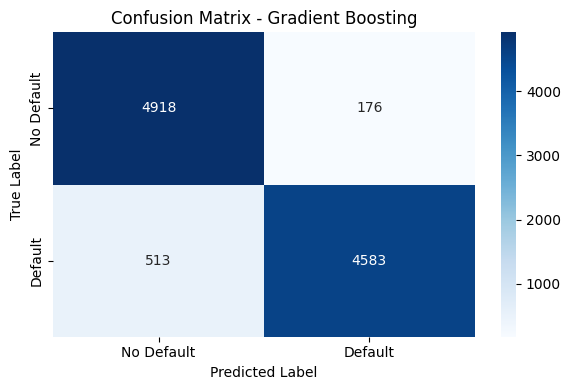

In [21]:
print("------ Gradient Boosting Results ------")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()

**ROC Curve**

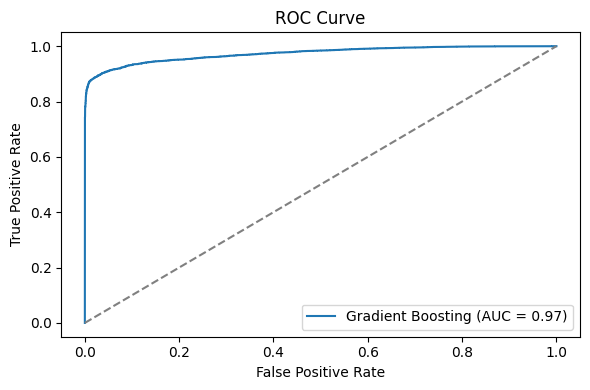

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Save the trained model**

In [24]:
import joblib
joblib.dump(gb_model, 'credit_risk_model.pkl')
print("Model saved as 'credit_risk_model.pkl'")

Model saved as 'credit_risk_model.pkl'
